## Import Data And Required Packages

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('C:\\PROJECTS\\mlproject\\notebook\\StudentsPerformance.csv')

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.shape

(1000, 8)

In [6]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [7]:
df.duplicated().sum()

0

no duplicate

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [10]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Exploring Dataset

In [ ]:
print("categories in gender variable:  ",end=" ")
print(df['gender'].unique())

print("categories in race/ethnicity variable:  ",end=" ")
print(df['race/ethnicity'].unique())

print("categories in parental level of education variable:  ",end=" ")
print(df['parental level of education'].unique())

print("categories in lunch variable:  ",end=" ")
print(df['lunch'].unique())

print("categories in test variable:  ",end=" ")
print(df['test preparation course'].unique())



categories in gender variable:   ['female' 'male']
categories in race/ethnicity variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
categories in parental level of education variable:   ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in lunch variable:   ['standard' 'free/reduced']
categories in test variable:   ['none' 'completed']


In [12]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print('We have {} numerical features: {}'.format(len(numeric_features), numeric_features))
print('We have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features: ['math score', 'reading score', 'writing score']
We have 5 categorical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


Adding new columns

In [13]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total score']/3

In [14]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [16]:
reading_full = df[df['reading score'] == 100]['average'].count()
print(f"Number of students with full marks in Maths: {reading_full}")

writing_full = df[df['writing score'] == 100]['average'].count()
print(f"Number of students with full marks in Maths: {writing_full}")

math_full = df[df['math score'] == 100]['average'].count()
print(f"Number of students with full marks in Maths: {math_full}")

Number of students with full marks in Maths: 17
Number of students with full marks in Maths: 14
Number of students with full marks in Maths: 7


In [17]:
reading_les_20 = df[df['reading score'] <= 20]['average'].count()
writing_les_20 = df[df['writing score'] <= 20]['average'].count()
math_les_20 = df[df['math score'] <= 20]['average'].count()

print(f"Number of student with less than 20 marks in reading : {reading_les_20}")
print(f"Number of student with less than 20 marks in writing : {writing_les_20}")
print(f"Number of student with less than 20 marks in math : {math_les_20}")




Number of student with less than 20 marks in reading : 1
Number of student with less than 20 marks in writing : 3
Number of student with less than 20 marks in math : 4


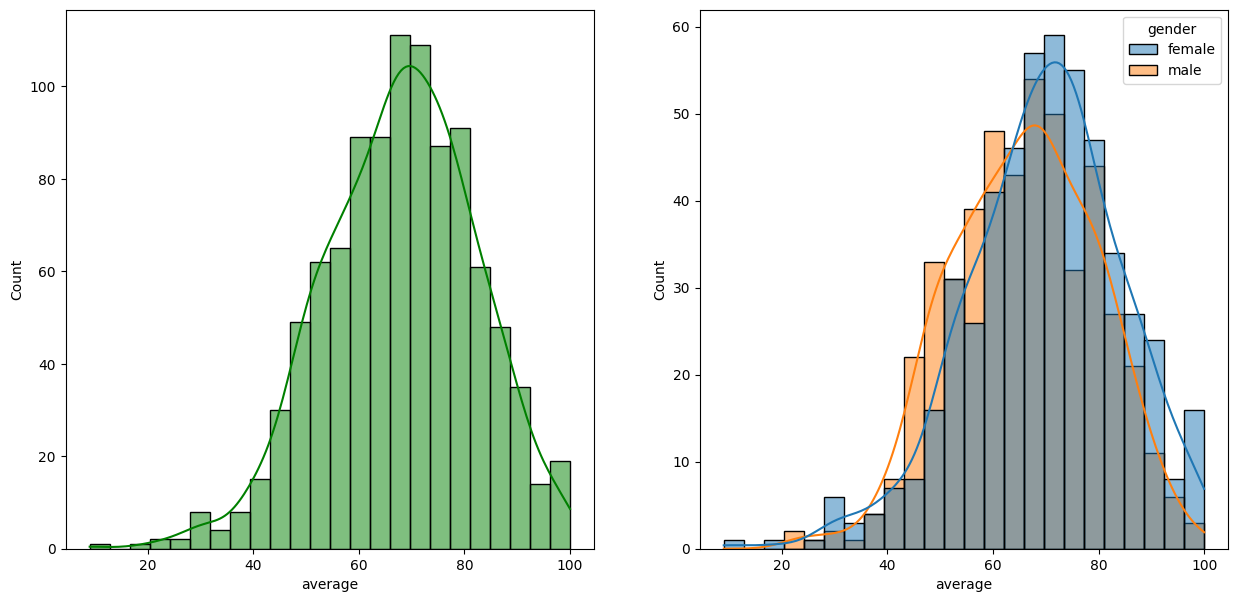

In [24]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average',kde='True',color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde='True',hue='gender')
plt.show()

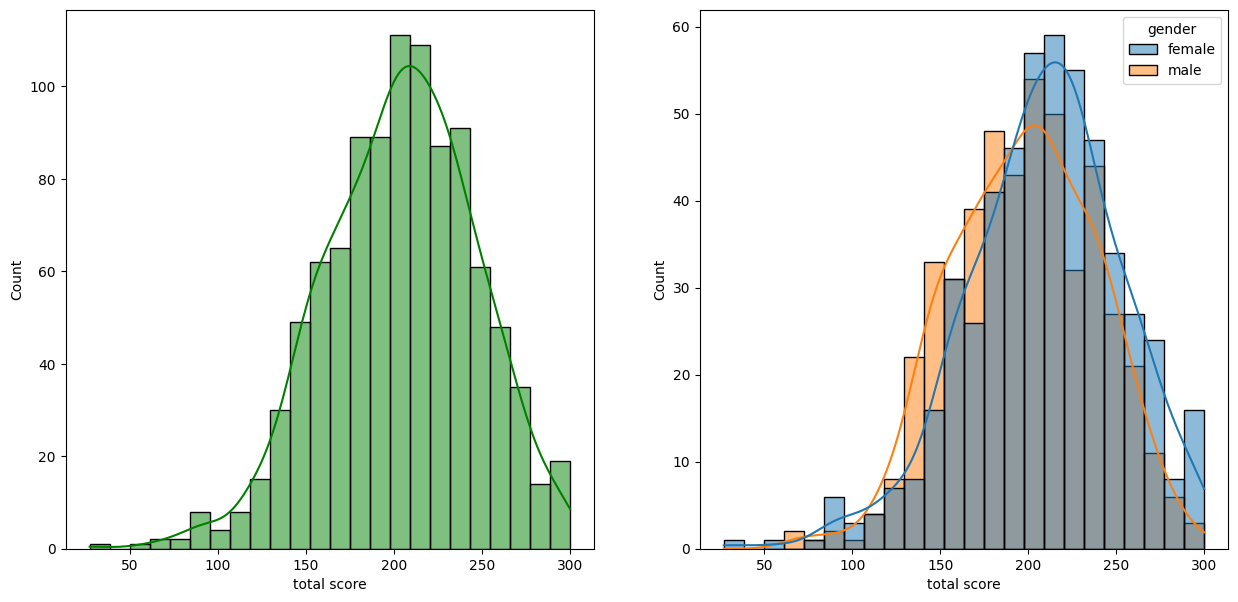

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total score',kde='True',color='g')
plt.subplot(122)
sns.histplot(data=df,x='total score',kde='True',hue='gender')
plt.show()

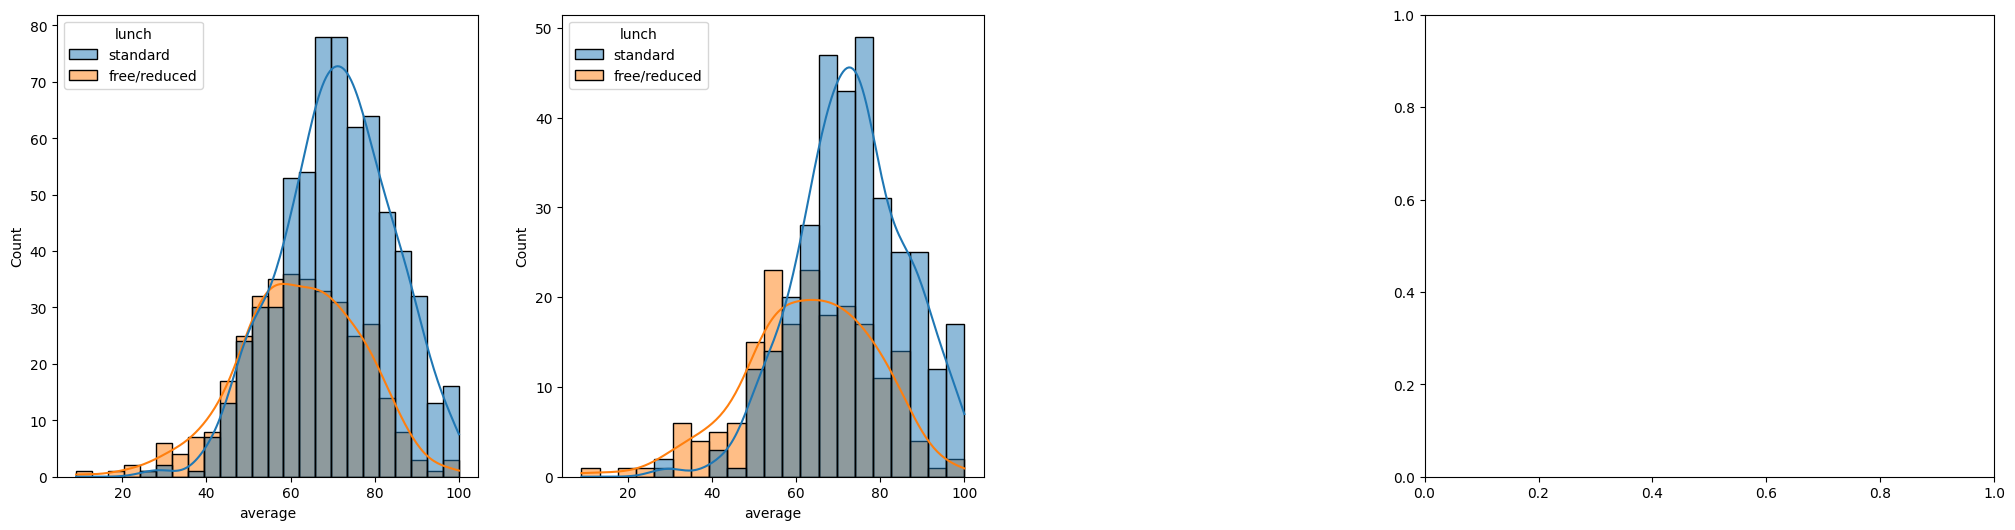

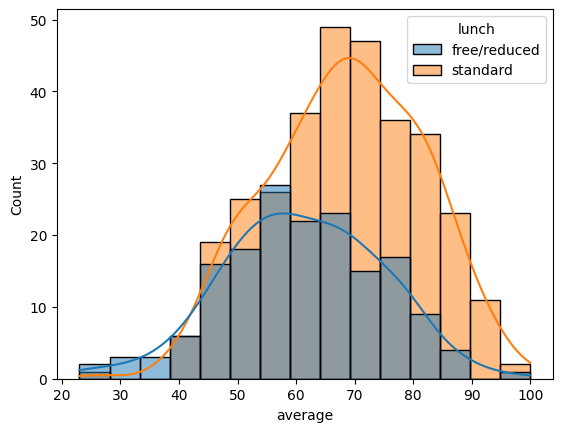

In [31]:
fig, axs = plt.subplots(1, 3, figsize=(25, 6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde='True',hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde='True',hue='lunch')
plt.show(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde='True',hue='lunch')
plt.show()


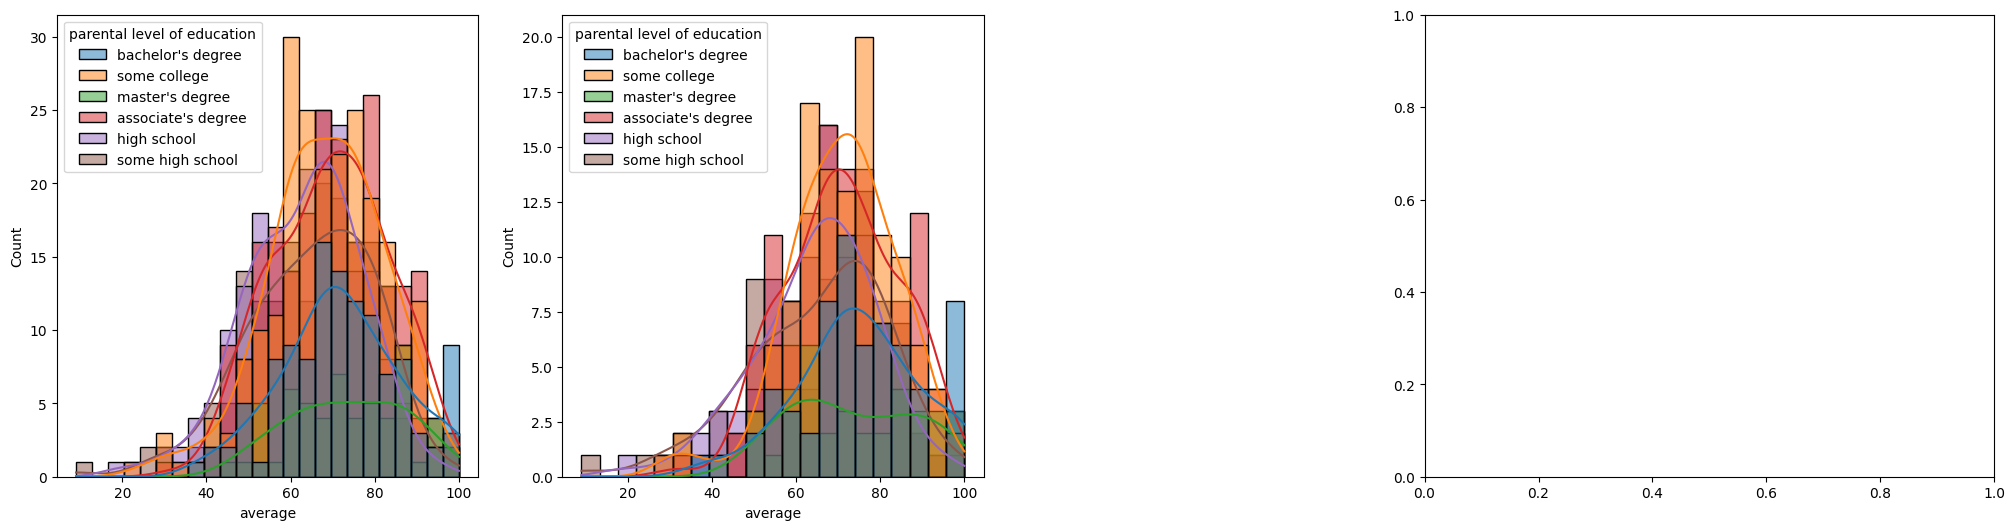

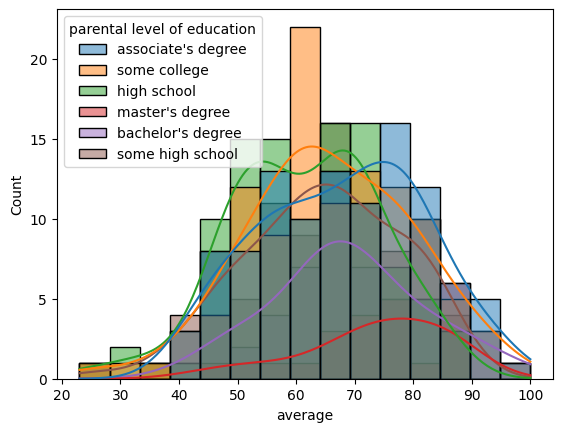

In [32]:
fig, axs = plt.subplots(1, 3, figsize=(25, 6))
plt.subplot(141)
ax = sns.histplot(data=df,x='average',kde='True',hue='parental level of education')
plt.subplot(142)
ax = sns.histplot(data=df[df.gender=='female'],x='average',kde='True',hue='parental level of education')
plt.show(143)
ax = sns.histplot(data=df[df.gender=='male'],x='average',kde='True',hue='parental level of education')
plt.show()


## Multivariate analysis using pieplot

(-1.25, 1.25, -1.25, 1.25)

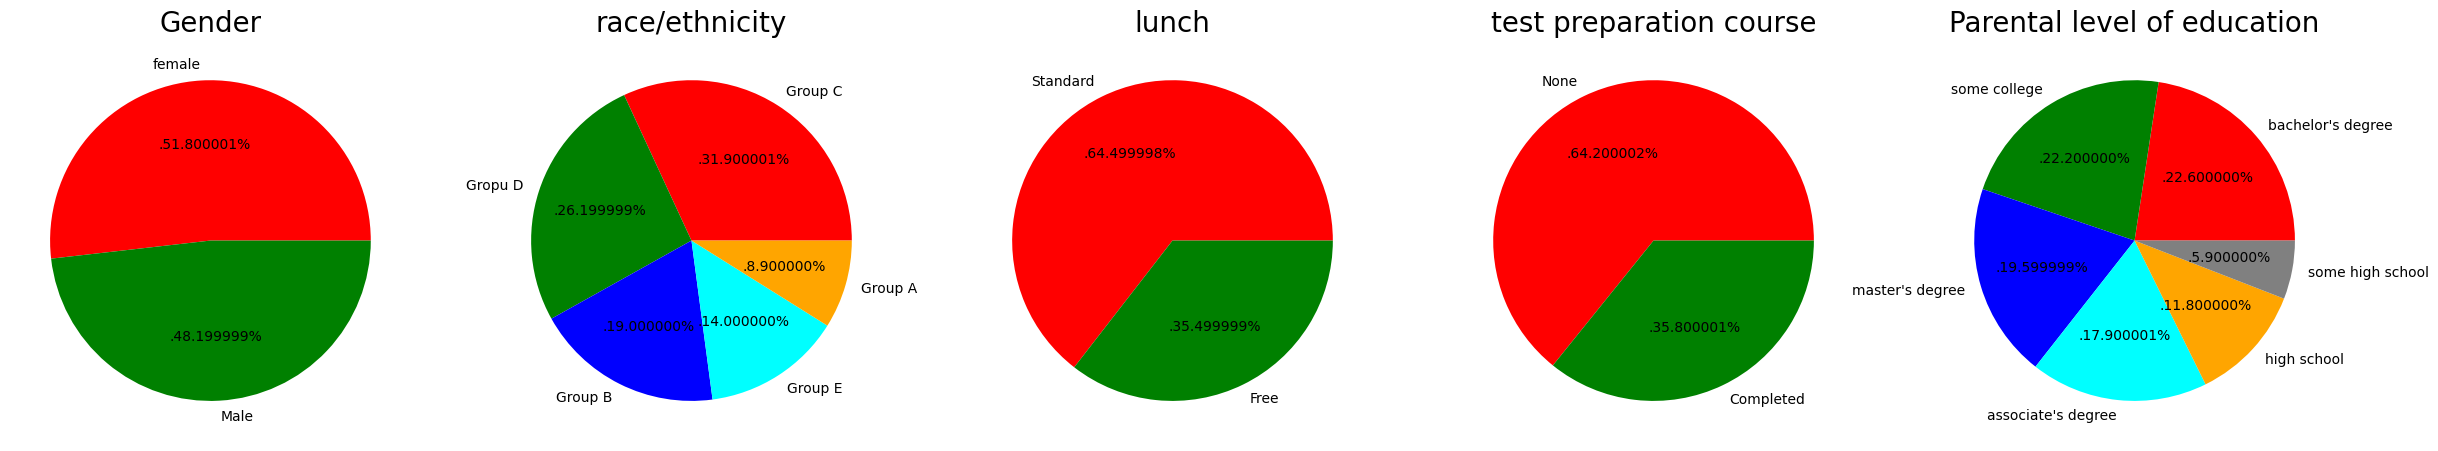

In [37]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1,5,1)
size = df['gender'].value_counts()
labels = 'female', 'Male'
color = ['red','green']

plt.pie(size, colors = color, labels = labels, autopct='.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')

plt.subplot(1,5,2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C','Gropu D', 'Group B', 'Group E', 'Group A'
color = ['red','green','blue','cyan','orange']

plt.pie(size, colors = color, labels = labels, autopct='.%2f%%')
plt.title('race/ethnicity', fontsize = 20)
plt.axis('off')

plt.subplot(1,5,3)
size = df['lunch'].value_counts()
labels = 'Standard','Free'
color = ['red','green']

plt.pie(size, colors = color, labels = labels, autopct='.%2f%%')
plt.title('lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1,5,4)
size = df['test preparation course'].value_counts()
labels = 'None','Completed'
color = ['red','green']

plt.pie(size, colors = color, labels = labels, autopct='.%2f%%')
plt.title('test preparation course', fontsize = 20)
plt.axis('off')

plt.subplot(1,5,5)
size = df['parental level of education'].value_counts()
labels = "bachelor's degree" ,'some college', "master's degree" ,"associate's degree", 'high school' ,'some high school'
color = ['red','green','blue','cyan','orange','grey']

plt.pie(size, colors = color, labels = labels, autopct='.%2f%%')
plt.title('Parental level of education', fontsize = 20)
plt.axis('off')




## UNIVARIATE ANALYSIS

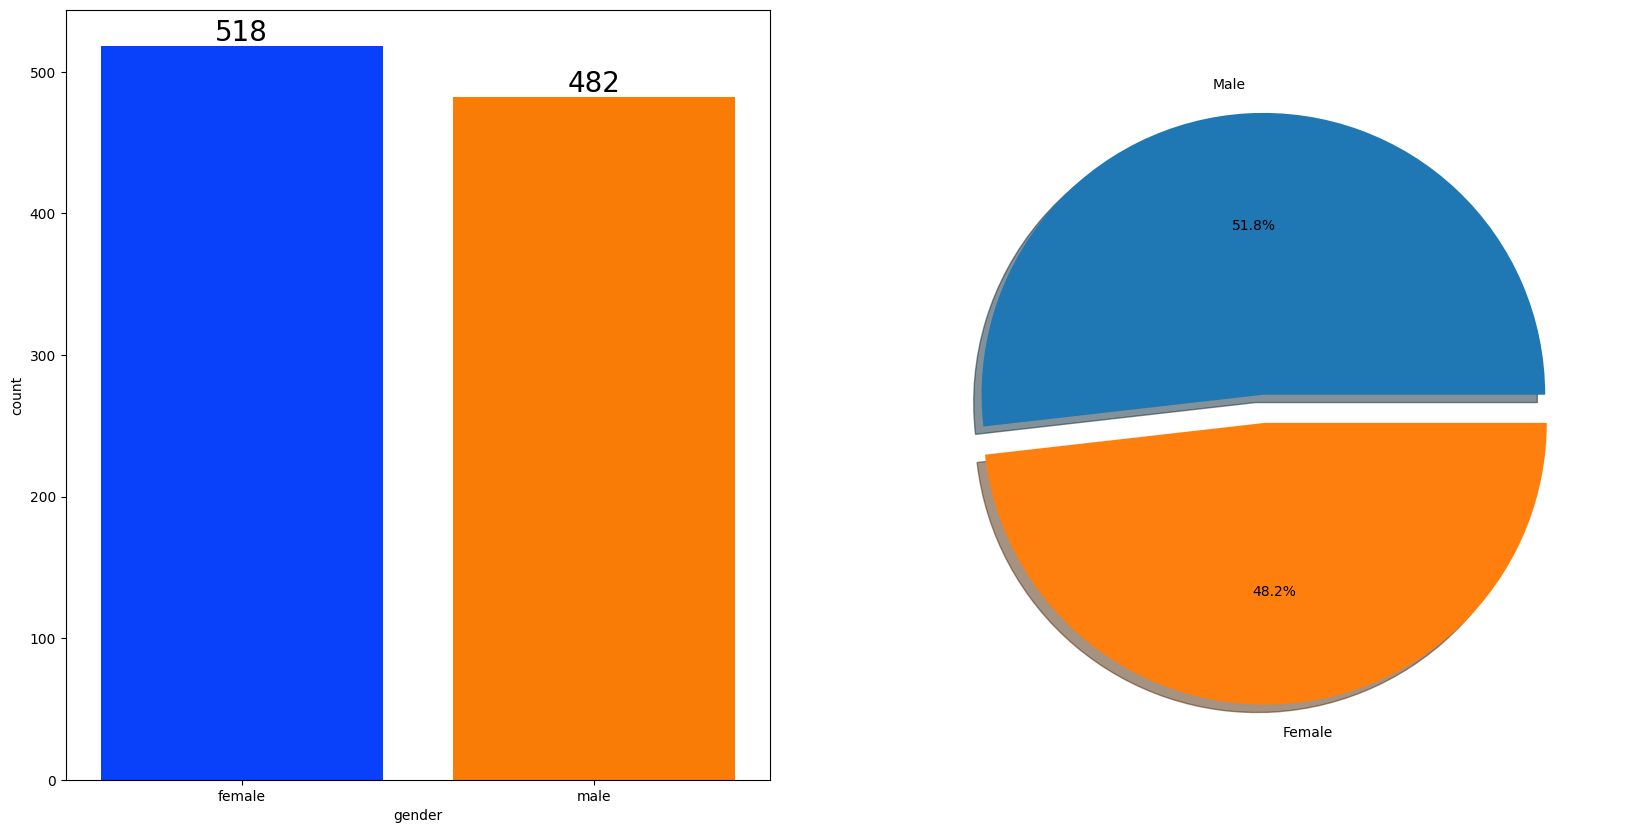

In [40]:
f, ax = plt.subplots(1,2, figsize=(20,10))
sns.countplot(x=df['gender'], data=df, palette='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black',size=20)

plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'], explode=[0,0.1],autopct='%1.1f%%',shadow=True)
plt.show()

In [44]:
gender_group = df.groupby('gender')
gender_group

In [46]:
plt.figure(figsize=(10,8))

X=['Total Average','Math Average']

female_scores = [gender_group['average'][0], gender_group['math score'][0]]
male_scores = [gender_group['average'][1], gender_group['math score'][1]]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, male_scores, 0.4, label= 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')

plt.show()


IndexError: Column(s) average already selected

<Figure size 1000x800 with 0 Axes>